In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../python/')
import NGC5533_functions as nf
import noordermeer as noord
import dataPython as dp

import astropy.units as u
import astropy.constants as c

# Disk model from Casertano's equations

A disk model of NGC 5533 (UGC 9133) galaxy was calculated and plotted, using "_Rotation Curve of the Edge-On Spiral Galaxy NGC 5907: disk and halo masses_" paper by Stefano Casertano (1983). Our goal was to reproduce Edo Noordermeer's rotation curve of NGC 5533 for each component, published in his "_Rotation curves of flattened Sersic bulges_" paper (from now on, "original paper"). 
<br>
In the first step, we calculated the <b>density distribution</b> (eq.2), and $\rho_0(r)$ was determined by the piecewise function (eq.3). Then the <b>partial derivative of the density distribution</b> was taken with respect to $u$ (which we assumed is the same as $r$). The density should go to zero beyond _R+$\delta$ = 37.38 kpc_ according to the piecewise function which we checked by plotting and printing the values for both the density and the partial derivative. We used the equation in Casertano's paper (eq.4) to find the <b>radial force</b> and found the <b>velocity</b> of the disk (eq.6). The final result was plotted and can be seen below. 

## Plot of the disk model

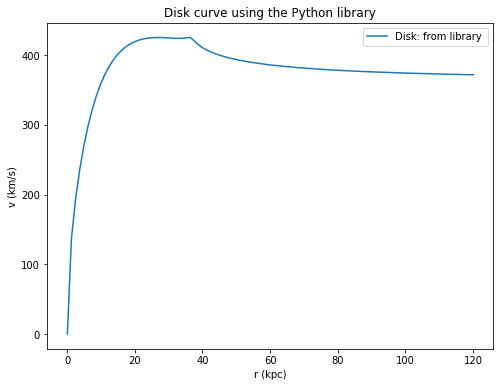

In [2]:
r = np.linspace(0.1,120,100)
plt.figure(figsize=(8,6))
plt.plot(r,nf.d_v(r,1,nf.h_c,nf.drho00_c,load=True,path='../fitting/'),label='Disk: from library ')
plt.xlabel('r (kpc)')
plt.ylabel('v (km/s)')
plt.title("Disk curve using the Python library")
plt.legend()
plt.show()

## Parameters

The parameters found for the disk of NGC 5533 are listed below. <br>
(There is a handy tool in astropy to convert units and to use constants which can be utilized in converting the parameters.)
<br><br>

<b>Gravitational constant ($G$)</b> was converted to $kpc*(km/s)^{2}$ $/$ $solar$ $mass$ to match all other units. <br><br>

<b>Radial scale-length ($h$)</b> was mentioned a few times by Noordermeer: <br> 
"_The stellar mass distribution in early-type disc galaxies: surface photometry and bulge–disc decompositions_" paper mentioned disc scalelength in arcseconds: 34.4 arcseconds (pg.1499), same paper mentions $h_R$ = 8.9 kpc as disk scalelength (pg.1494). The arcseconds from this paper were converted to kpc using the galaxy's distance of 54.3 Mpc from the same paper and resulted in 9.1 kpc.<br>
"_The mass distribution in early-type disc galaxies: declining rotation curves and correlations with optical properties_" paper mentions R-band disc scalelength of 9.1 kpc (pg.1515). <br><br>

<b>Disk surface density ($\rho_{00}$)</b>: Casertano's equations (eq.2 & eq.3) contain a $\rho_{00}$ which is not fully explained other than "the central surface density $\mu_0$ = 2$\rho_{00}z_0$." This parameter is not mentioned or explained later in his paper. We started to use the halo surface density instead whihch he provides in his original paper. Note: this is only a scaling factor and doesn't affect the shape of the curve. <font color="red"> <b> Still searching for this value! </b></font><br><br>

<b>Mass-to-light ratio ($\Upsilon_d$)</b>: This value is a scaling factor from Noordermeer's "_Rotation curves of flattened sersic bulges_" paper. The prefactor used in our equations is

\begin{equation}
\Upsilon_d \cdot \frac{L_{d,R}}{\int_0^{\infty} rdr \int_{-\infty}^{\infty} dz \rho(r,z)}
\end{equation}

Where *L<sub>d,R</sub>* is the luminosity, *&Upsilon;<sub>d</sub>* is the assumed mass-to-light ratio, and the integral is the mass *M*. If the prefactor is 1, then we have assumed the correct mass-to-light ratio. Therefore, we can find the correct mass-to-light ratio using:

\begin{equation}
\frac{\Upsilon_d \cdot}{\Upsilon_{real}} = \frac{p}{1}
\end{equation}

Where *p* is the prefactor used in the numeric calculation. (The same luminosity and mass are used throughout the calculation, so they cancel themselves out.) We can therefore write:

\begin{equation}
\Upsilon_d \cdot = p*\Upsilon_{real}
\end{equation}

Which gives us the value of the mass-to-light ratio based on a fitted or chosen prefactor.
<br>

<b>Parameters depending on the scalelength</b>: <br>
<b>Half-thickness of the disk ($z_0$)</b>: We assumed this is the same as what Noordermeer calls vertical scaleheight. He defines: "vertical scaleheight of one-fifth of the stellar disc scalelength" (Noordermeer pg.1363). Casertano also defines: "assumed half-thickness $z_0$=0.2h" (Casertano pg.739).<br>
<b>Cutoff radius ($R$)</b>: not mentioned by Noordermeer but Casertano, he defines: "R=4h" (Casertano pg.738)<br>
<b>Cutoff length ($d$ or $\delta$)</b>: not mentioned by Noordermeer but Casertano, he defines: "$\delta$=0.2h" (Casertano pg.738)<br>
<br><br>

In [3]:
#Parameters for Galaxy NGC 5533

G = c.G                       #gravitational constant 
G = G.to((u.kpc * (u.km / u.second)**2) / (u.solMass))      # converting to (kpc*(km/s)^2/solar mass)
print("Gravitational constant is {}.".format(G))

# From Noordermeer's The stellar mass distribution in early-type disc galaxies: 
                   # surface photometry and bulge–disc decompositions
# hR (R band scale length)    
h = 8.9 * u.kpc               #radial scale-length (kpc)

# same paper, different value
h_arcsec = 34.4 * u.arcsec
D = 54.3 * u.Mpc
h_Mpc = (h_arcsec.to(u.degree)/(360 * u.degree)) * 2 * np.pi * D
h_kpc = h_Mpc.to(u.kpc)
print("Radial scalelength is {}.".format(h_kpc))

# still serching for this value
rho00 = 0.31e9                #central surface density (solar mass/kpc^2) - using halo density for now

# From Noordermeer's Rotation curves of flattened sersic bulges
epsdisk = 5.0                 #mass-to-light ratio disk

# Parameters depending on scale-length, from Noordermeer and Casertano
z0 = 0.2*h                    #half-thickness (kpc) (Noordermeer & Casertano)
R = 4*h                       #cut-off radius (kpc) (Casertano)
d = 0.2*h                     #cut-off length upper limits (kpc) (Casertano)

Gravitational constant is 4.300917270069976e-06 km2 kpc / (s2 solMass).
Radial scalelength is 9.055931712181243 kpc.


## Equations



>__Density Distribution__: <br>
    \begin{equation}
    \rho(r,z) = \rho_0(r)\left[\cosh\left(\frac{z}{z_0}\right)\right]^{-2}
    \end{equation}<br>
    and:
    \begin{equation}
    \rho_0(r) = 
    \begin{cases}
    \rho_{00}(r)e^{-\frac{r}{h}}       & \quad \text{if } r\leq R \\
    \rho_{0}(R)\left[1-\frac{r-R}{\delta}\right]       & \quad \text{if } R<r\leq R+\delta \\
    0       & \quad \text{if } r > R+\delta \\
  \end{cases}
\end{equation}
    <br>
>where:<br>
    $\rho_{00}$ = central density<br>
    $h$ = radial scale length<br>
    $R$ = cut-off radius<br>
    $\delta$ = cut-off length upper limits<br>
    $z_0$ = half-thickness<br>
    
>__Gravitational Force__: <br>
    \begin{equation}
    F_{rd}(r) = 4\pi G \int_{0}^{\infty} u  du \int_{0}^{\infty} dz \left[\frac{\partial\rho(u,z)}{\partial u}\right] 2 \frac{\mathscr{K}(p)-\mathscr{E}(p)}{\pi\sqrt{rup}} 
    \end{equation}<br>
>where:<br>
        $\mathscr{K}$ and $\mathscr{E}$ = complete elliptic integrals<br>
        $G$ = gravitational constant<br>
>and:<br>
>\begin{equation}
   x = \frac{r^{2}+u^{2}+\xi^{2}}{2ru}
   \end{equation}<br>
   \begin{equation}
   p = x - \sqrt{x^{2}-1}
   \end{equation}<br>
    
>__Velocity__: <br>
    <font color="green">
    \begin{equation}
    V_{D}^{2}(r) = -rF_{rd}(r)
    \end{equation}<br></font>

## Comparison

We are comparing our calculated disk curve using Casertano's equations to Noordermeer's published disk curve (data was retrieved using DataThief) from his "_Rotation curves of flattened Sersic bulges_" paper. <br>
The rotation curve of the disk component of NGC 5533 galaxy was calculated and plotted using Python. <font color="red"> <b> The resulting model does not resemble Noordermeer's disk model. </b> </font> The velocity should be declining after the truncation of the disk (at 37.38 kpc) which was defined by the piecewise function. However, in our disk, the velocity evens out at around 150 km/s. <br>
According to his email, Noordermeer used a GIPSY task to compute the disk model but could not remember details. We assumed this was the ROTMOD task. The GIPSY program seems to have some issues when installing. So far, we only had success running the ROTMOD task separately. The arguments used were:  <br> <b> TYPE=DISK   ZLAW=SIMPLE-SECH   Z0=1.78   USER=N   DENS0=310   H=8.9   RCUT=35.6   DELTA=1.78   MASS=160   RADII=1:120:0.1</b><br>
Running the above argument, the ROTMOD program created a text file containing radii from 1 to 120 kpc with 0.1 kpc increments and corresponding velocities. The data was then plotted and compared with both our disk and Noordermeer's disk. See below. 

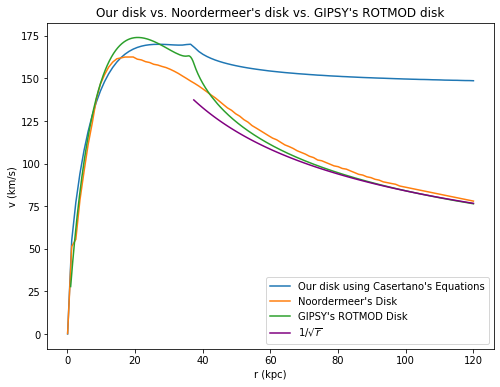

In [4]:
def f(r):
    return 840 / np.sqrt(r)
rplot = np.linspace(37.38,120,100)

gdata = dp.getXYdata('../fitting/data/final/nord-120kpc-disk-gipsy.txt') #data from GIPSY
rdat = np.asarray(gdata['xx']) #radius values
gvel = np.asarray(gdata['yy']) #velocities from GIPSY

plt.figure(figsize=(8,6))
plt.plot(r,0.4*nf.d_v(r,1,nf.h_c,nf.drho00_c,load=True,path='../fitting/'),label="Our disk using Casertano's Equations")
plt.plot(r,noord.noord_disk(r),label="Noordermeer's Disk")
plt.plot(rdat,gvel,label="GIPSY's ROTMOD Disk")
plt.plot(rplot, f(rplot),'purple',label='1/$\sqrt{r}$')

plt.xlabel('r (kpc)')
plt.ylabel('v (km/s)')
plt.title("Our disk vs. Noordermeer's disk vs. GIPSY's ROTMOD disk")
plt.legend()
plt.show()

<font color="red"> <b> None of the three rotation curves are matching </b> </font>which makes us believe that Noordermeer might have used a measured density profile instead of Casertano's generic density equation.  <br><br>
Additionally, the velocities of the disk model beyond the truncation (where there are no more mass detected) <font color="red"> <b>should be proportional to 1/$\sqrt{r}$. </b> </font> This comparison is plotted below. 

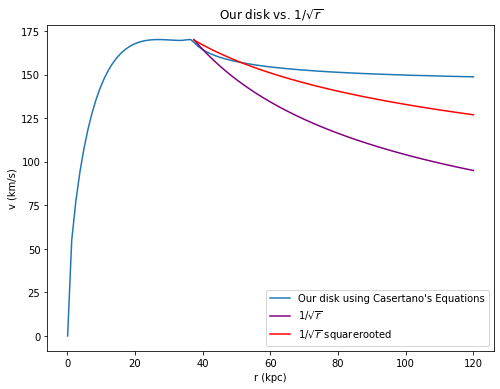

In [5]:
def f(r):
    return 1040 / np.sqrt(r)

def f2(r):
    return 420 / np.sqrt(np.sqrt(r))

rplot = np.linspace(37.38,120,100)
plt.figure(figsize=(8,6))
plt.plot(r,0.4*nf.d_v(r,1,nf.h_c,nf.drho00_c,load=True,path='../fitting/'),label="Our disk using Casertano's Equations")
plt.plot(rplot, f(rplot),'purple',label='1/$\sqrt{r}$')
plt.plot(rplot, f2(rplot),'r',label='1/$\sqrt{r}$ squarerooted')

plt.xlabel('r (kpc)')
plt.ylabel('v (km/s)')
plt.title("Our disk vs. 1/$\sqrt{r}$")
plt.legend()
plt.show()

# Conclusion

Questions: <br>

 - Why doesn't our disk curve start to decline beyond the truncation corresponding to 1/$\sqrt{r}$? <br>
 Did we make a mistake when integrating? <br>
 Did Casertano make a mistake? <br>
 Can we figure this out by looking at the rotmod.c code? <br>
 Do we need to figure this out or should we just accept the fact that we can't model it with Python and just use GIPSY instead?<br><br>
 - Why doesn't Noordermeer's graph match the GIPSY model? <br>
 Did he use a measured density distribution instead of Casertano's density model? <br>
 If he did, how can we obtain this data? <br>
 How did he obtain the data? 